In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from env import username, password, host
import wrangle

In [3]:
 df = wrangle.get_zillow_data()

/usr/local/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


In [5]:
#2. walk through the summarization and cleaning steps in your wrangle.ipynb file like we 
# did above. You may handle the missing values however you feel is appropriate and meaningful

In [5]:
df.shape

(2985217, 8)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2985217.0,1.492608e+06,861758.063609,0.00,746304.00,1492608.00,2238912.0,2.985216e+06
bedroomcnt,2982272.0,3.093362e+00,1.271569,0.00,2.00,3.00,4.0,2.500000e+01
bathroomcnt,2982260.0,2.216196e+00,1.078250,0.00,2.00,2.00,3.0,3.200000e+01
calculatedfinishedsquarefeet,2940120.0,1.831455e+03,1954.198051,1.00,1215.00,1574.00,2140.0,9.525760e+05
taxvaluedollarcnt,2950951.0,4.435279e+05,816336.627054,1.00,188220.00,321161.00,514072.0,3.196225e+08
yearbuilt,2937384.0,1.964438e+03,23.644275,1801.00,1950.00,1963.00,1981.0,2.016000e+03
taxamount,2962465.0,5.408949e+03,9675.566706,0.24,2468.62,4007.62,6230.5,3.823176e+06
fips,2982285.0,6.048053e+03,20.240825,6037.00,6037.00,6037.00,6059.0,6.111000e+03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), int64(1)
memory usage: 182.2 MB


In [8]:
df.isnull().sum()

Unnamed: 0                          0
bedroomcnt                       2945
bathroomcnt                      2957
calculatedfinishedsquarefeet    45097
taxvaluedollarcnt               34266
yearbuilt                       47833
taxamount                       22752
fips                             2932
dtype: int64

Takeaways
There are null values in all columns except fips.
Fips should be data type string intead of float.
Given that there are numerous null values in most columns I am going to use the average in each column to fill in the null values.

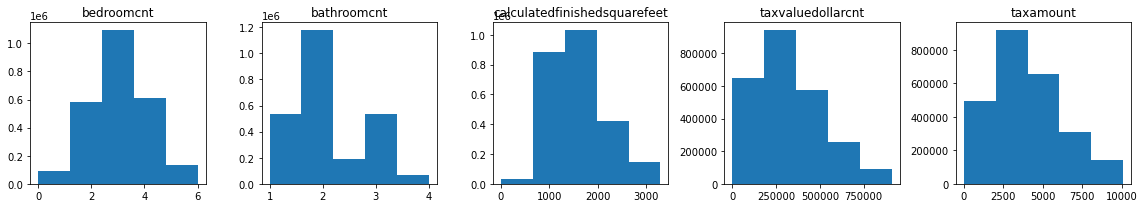

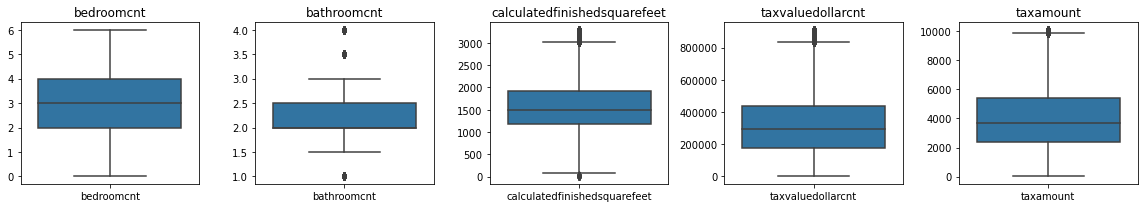

/Users/sarahwoods/codeup-data-science/regression-exercises/wrangle.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['yearbuilt']] = imputer.transform(train[['yearbuilt']])
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/sarahwoods/codeup-data-science/regression-exercises/wrangle.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [10]:
train, validate, test = wrangle.prepare_zillow(df)

In [11]:
train.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
fips                            0
dtype: int64

In [ ]:
##########################Initial work I would like to replace with prepare_zillow function

In [9]:
#find the average of all columns at once since this is much faster
df.mean(axis=0)

Unnamed: 0                      1.492608e+06
bedroomcnt                      3.093362e+00
bathroomcnt                     2.216196e+00
calculatedfinishedsquarefeet    1.831455e+03
taxvaluedollarcnt               4.435279e+05
yearbuilt                       1.964438e+03
taxamount                       5.408949e+03
fips                            6.048053e+03
dtype: float64

In [10]:
#replace the nulls in each column with the average value
#text= {'bedroomcnt':3.287195,'bathroomcnt':2.230687,'calculatedfinishedsquarefeet':1862.855178,'taxvaluedollarcnt':461896.052361,'yearbuilt':1960.949681,'taxamount':5634.863752}

In [11]:
#replace the null values in bdrcnt
df.bedroomcnt = df.bedroomcnt.isnull() == 3.287195

In [12]:
#check to see that it worked
df.isnull().sum()

Unnamed: 0                          0
bedroomcnt                          0
bathroomcnt                      2957
calculatedfinishedsquarefeet    45097
taxvaluedollarcnt               34266
yearbuilt                       47833
taxamount                       22752
fips                             2932
dtype: int64

In [13]:
#replace the null values in bathrmcnt
df.bathroomcnt = df.bathroomcnt.isnull() == 2.230687

In [14]:
#replace the null values in calcfinshdsqft
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.isnull() == 1862.855178

In [15]:
#replace the null values in taxvaluedolrcnt
df.taxvaluedollarcnt = df.taxvaluedollarcnt.isnull() == 461896.052361

In [16]:
#replace the null values for yearbuilt
df.yearbuilt = df.yearbuilt.isnull() == 1961

In [17]:
#replace null values for taxamount
df.taxamount = df.taxamount.isnull() == 5634.863752

In [18]:
#check to see that it worked
df.isnull().sum()

Unnamed: 0                         0
bedroomcnt                         0
bathroomcnt                        0
calculatedfinishedsquarefeet       0
taxvaluedollarcnt                  0
yearbuilt                          0
taxamount                          0
fips                            2932
dtype: int64

In [19]:
df.fips = df.fips.fillna(df.fips.mode()[0])

In [20]:
df.fips.head()

0    6037.0
1    6037.0
2    6037.0
3    6037.0
4    6037.0
Name: fips, dtype: float64

In [ ]:
df.fips = df.fips.astype(str)

In [21]:
df.fips.isnull().sum()

0

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


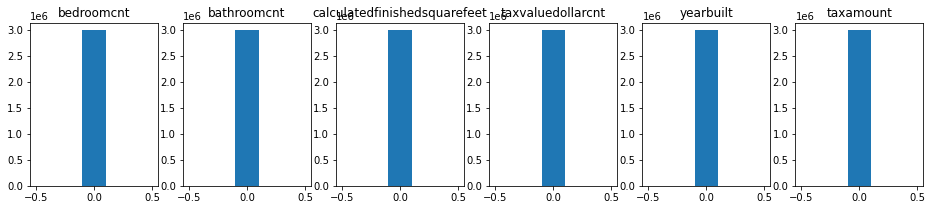

In [33]:
# the next step is to create a histogram 
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built','Unnamed: 0']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

In [ ]:
#so now that we established we have outliers

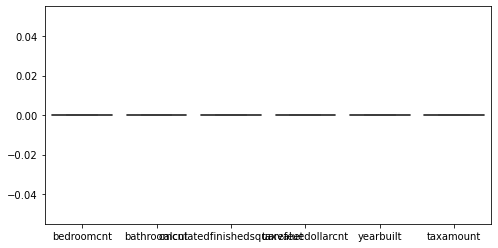

In [32]:
#now let's create boxplots
plt.figure(figsize=(8,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df.drop(columns=['fips','Unnamed: 0']))

plt.show()

In [29]:
#the visualizations show me I need to remove outliers
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [38]:
#this didn't work it says not to use the - symbol
df = remove_outliers(df, 1.5, ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount', 'yearbuilt'])
df

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

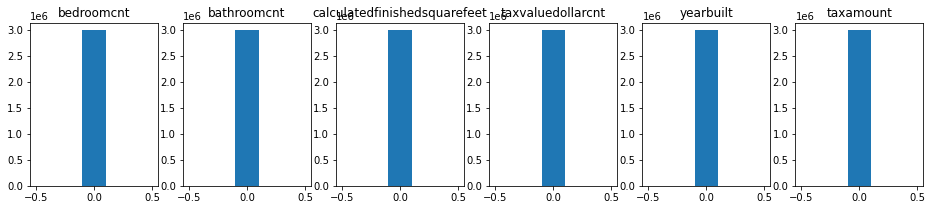

In [34]:
# visualize the changes in a histogram 
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built','Unnamed: 0']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

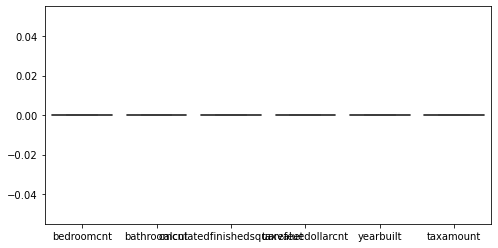

In [35]:
#visualize the changes in  boxplots
plt.figure(figsize=(8,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df.drop(columns=['fips','Unnamed: 0']))

plt.show()

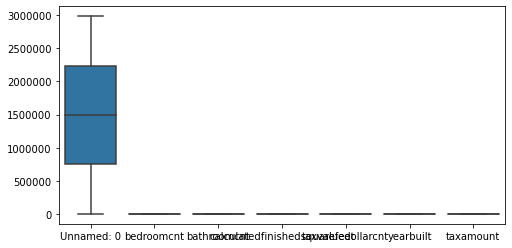

In [36]:

plt.figure(figsize=(8,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df.drop(columns=['fips']))

plt.show()

In [39]:
#More preparation - avoiding target leakage
df = df.drop(columns=['taxamount'])

In [ ]:
#Split the data
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [43]:
def wrangle_zillow(df):
    wrangle.get_zillow_data()
    wrangle.prepare_zillow()

wrangle_zillow(df)

AttributeError: module 'wrangle' has no attribute 'prepare_zillow'